# Linear Regression

- Predicts continuous values
- Use gradient descent for parameter optimization
- Min mean squared error (MSE)
- How to do?
  - Init weights and bias
  - perform grad to optimize parameters

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

## Gradient descent
- First we need to calcualte the error/residual for each sample
- Difference between predicted and actual values
- Positive value means overestimation
- Negative value means underestimation
- $X^T*...$
  Linear relationship $y=wx+b$

  
  For example we have the array $X=[1,2,3]$, $y=[3,5,7]$ and the  weights $[1.5]$ and bias 0.
  we can calculate $y_{predicted} = [1,2,3]^T*[1.5]+bias$. So we can calculate weight gradient $dw=1/3*[1,2,3]^T*[error1,erro2,erro3]$ where $error=[error1, error2, error3]=y_{predicted} - y$. Similarly, we can calculate the bias gradient $db= (1/n_{samples})*np.sum(error)$

In [17]:
class LR:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate= learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        
    #training ffunction
    #feature matrix X and target vector y
    #steps:
    ## determine number of samples and features
    ## initialize weights 
    def fit(self, X, y):
        # return number of rows and cols
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent
        for _ in range(self.iterations):
            #multiply X with weighs
            y_predicted = np.dot(X, self.weights)+self.bias
            #compute gradients
            #dw: measure how much error changes with weight adjustment
            #use mean of prediction errors scaled by features       
            
            dw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            #db: measure overall error adjustment
            #average of prediction errors
            db = (1/n_samples)*np.sum (y_predicted -y)
            
            
            # update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        return self

    def predict_1(self, X):
        return np.dot(X, self.weights) + self.bias
    def predict(self, X):
        #given an input, we can get the output by multiplying weights with input
        output = np.dot(X, self.weights)+ self.bias
        print(output.shape)
        return output


    
    
    
   
 # 

Mean error square: 0.03621638036352822


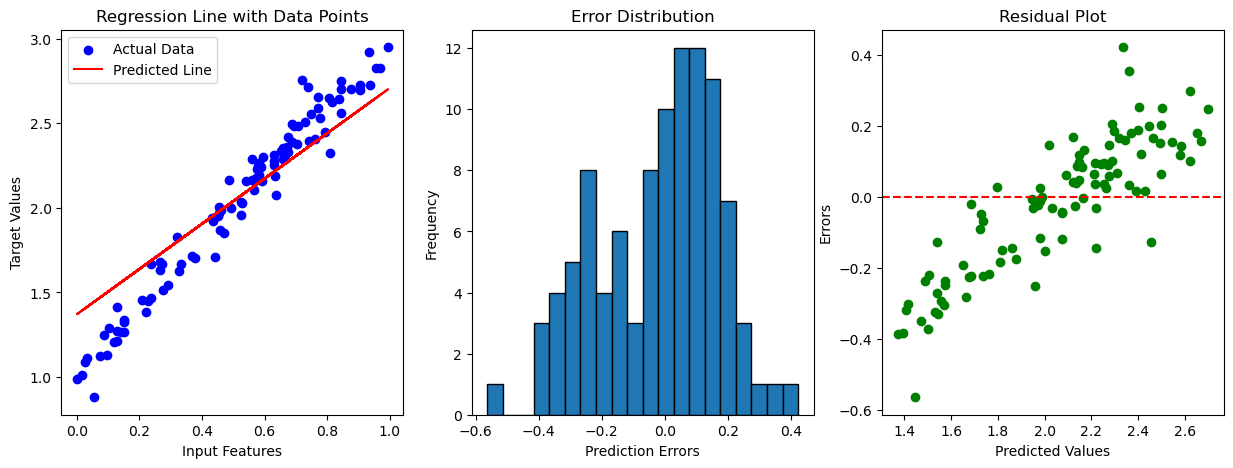

In [18]:
def demo_ML():

    #we will create a demo to predict the value of the linear function
    #y= 2x+1
    #Generate X with the same 100x1
    X_reg = np.random.rand(100,1)
    #
    #print(X_reg)
    # generate y corresponding to X
    y_reg = 2 * X_reg + 1+ np.random.normal(0, 0.1, (100,1))
    # since y_reg has a shape (100,1) but the output require (100,)
    # so we need to do reshape
    y_reg = y_reg.reshape(-1)
    #print(y_reg)
    lr = LR()
    
    #train
    lr.fit(X_reg, y_reg)
    y_predicted = lr.predict_1(X_reg)
    #print(y_predicted)
    
    print("Mean error square:", mean_squared_error(y_reg, y_predicted))
    mse = mean_squared_error(y_reg, y_predicted)
    errors = y_reg - y_predicted
    plt.figure(figsize=(15, 5))
    
    # 1. Scatter plot with regression line and errors
    plt.subplot(131)
    plt.scatter(X_reg, y_reg, color='blue', label='Actual Data')
    plt.plot(X_reg, y_predicted, color='red', label='Predicted Line')
    plt.title('Regression Line with Data Points')
    plt.xlabel('Input Features')
    plt.ylabel('Target Values')
    plt.legend()
    
    # 2. Error Distribution (Histogram)
    plt.subplot(132)
    plt.hist(errors, bins=20, edgecolor='black')
    plt.title('Error Distribution')
    plt.xlabel('Prediction Errors')
    plt.ylabel('Frequency')
    
    # 3. Residual Plot (Errors vs Predicted Values)
    plt.subplot(133)
    plt.scatter(y_predicted, errors, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
demo_ML()